In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

city_df = pd.read_csv('san_francisco.csv')
print(city_df.head(3))

   Unnamed: 0             datetime  humidity  pressure  temperature  \
0           0  2012-10-01 12:00:00      88.0    1009.0   289.480000   
1           1  2012-10-01 13:00:00      88.0    1009.0   289.480000   
2           2  2012-10-01 14:00:00      87.0    1009.0   289.474993   

  weather_description  wind_direction  wind_speed  hour  day  week  month  
0          light rain           150.0         2.0    12    1    40     10  
1          light rain           150.0         2.0    13    1    40     10  
2        sky is clear           147.0         2.0    14    1    40     10  


# General data summary

In [7]:
city_df.describe()

,Unnamed: 0,humidity,pressure,temperature,wind_direction,wind_speed,hour,day,week,month
count,45253.000000,44461.000000,44461.000000,44461.000000,44461.000000,44461.000000,45253.000000,45253.000000,45253.000000,45253.000000
mean,22626.000000,76.837498,1018.841547,288.155850,209.299296,2.786757,11.501337,15.725322,27.134378,6.648730
std,13063.560203,17.428204,7.334438,5.332806,95.587621,2.284013,6.922398,8.793919,15.134942,3.464906
min,0.000000,6.000000,985.000000,272.300000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,11313.000000,68.000000,1014.000000,284.670000,160.000000,1.000000,6.000000,8.000000,14.000000,4.000000
50%,22626.000000,81.000000,1018.000000,287.610000,232.000000,2.000000,12.000000,16.000000,27.000000,7.000000
75%,33939.000000,89.000000,1023.000000,291.014667,280.000000,4.000000,18.000000,23.000000,41.000000,10.000000
max,45252.000000,100.000000,1044.000000,313.620000,360.000000,43.000000,23.000000,31.000000,53.000000,12.000000


# Average values experienced each month


In [8]:
monthly_group = pd.DataFrame(city_df.groupby('month').mean())
print(monthly_group)

monthly_group.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

def perform_analysis(feature):
    """Performs monthly analysis and plotting"""
    
    mean_value = monthly_group[feature].mean()
    maximum_value = monthly_group[feature].max()
    minimum_value = monthly_group[feature].min()
    ten_percent = maximum_value/100

    print(f'Mean {feature} is: {mean_value}')
    print(f'Maximum {feature} is: {maximum_value}')
    print(f'Minimum {feature} is: {minimum_value}')
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    # To zoom into the plot
    ax.set(ylim=[minimum_value - ten_percent,
                 maximum_value + ten_percent])
         
    ax.bar((monthly_group.index), (monthly_group[feature]))
    plt.title(f'{feature} variation chart'.title())
    plt.xticks((monthly_group.index))
    plt.show()

         Unnamed: 0   humidity     pressure  temperature  wind_direction  \
month                                                                      
1      20092.300000  76.240054  1022.873925   283.456387      170.210215   
2      20864.861702  78.402187  1021.200946   284.987995      188.799350   
3      21513.100000  76.294624  1020.950538   286.431086      202.795699   
4      22245.100000  71.332222  1019.478611   287.459154      223.583611   
5      22977.100000  77.337097  1017.510753   288.991685      222.080645   
6      23709.100000  79.966944  1016.013056   291.006091      217.926667   
7      24441.100000  77.872581  1013.974194   292.621702      224.365054   
8      25185.100000  80.566129  1015.754839   292.010339      232.772581   
9      25917.100000  75.418056  1015.561389   292.117253      229.095278   
10     22327.537736  75.614643  1019.135185   289.323956      214.515492   
11     22880.327670  76.632222  1022.024444   285.933779      197.691944   
12     19348

### Humidity

Mean humidity is: 76.85597088773436
Maximum humidity is: 80.56612903225806
Minimum humidity is: 71.33222222222223


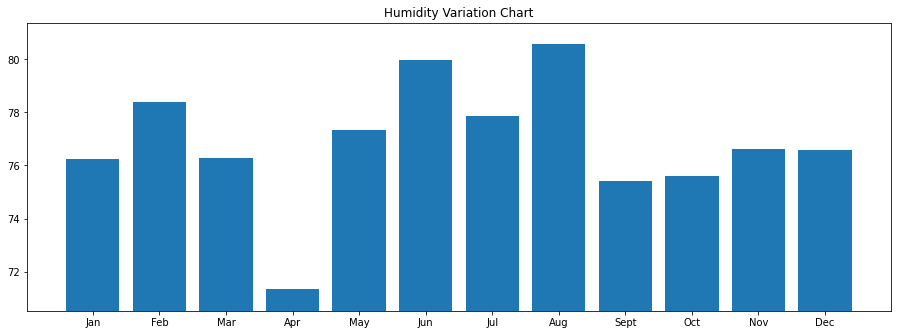

In [9]:
perform_analysis('humidity')

### Pressure

Mean pressure is: 1018.8489629264847
Maximum pressure is: 1022.8739247311828
Minimum pressure is: 1013.9741935483871


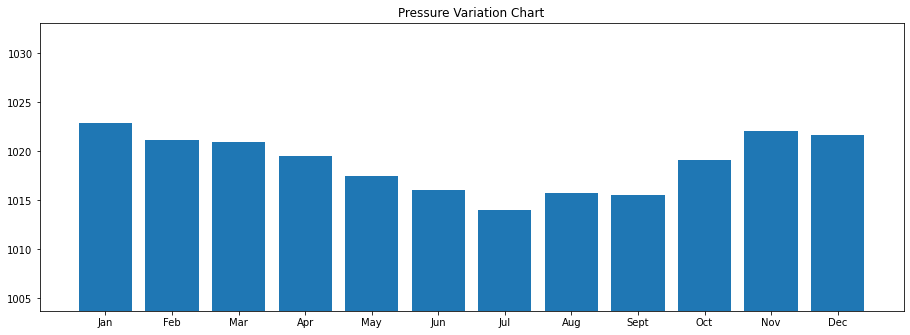

In [10]:
perform_analysis('pressure')

### Temperature

### Note the inverse correlation between temperature and humidty

Mean temperature is: 288.12580243677985
Maximum temperature is: 292.62170181132825
Minimum temperature is: 283.17020219190294


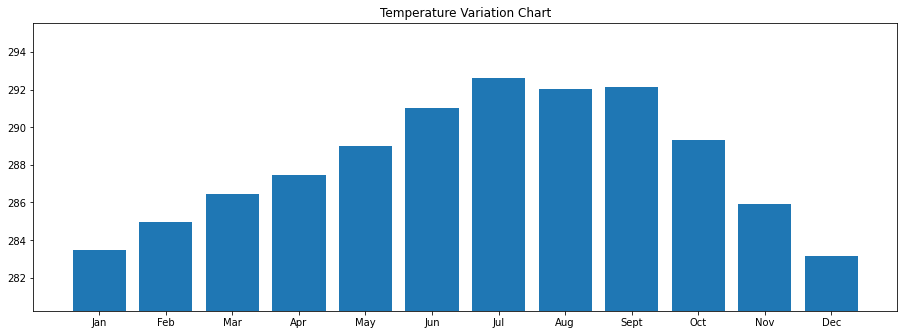

In [11]:
perform_analysis('temperature')

### Wind Direction

Mean wind_direction is: 209.15416471680183
Maximum wind_direction is: 232.7725806451613
Minimum wind_direction is: 170.21021505376345


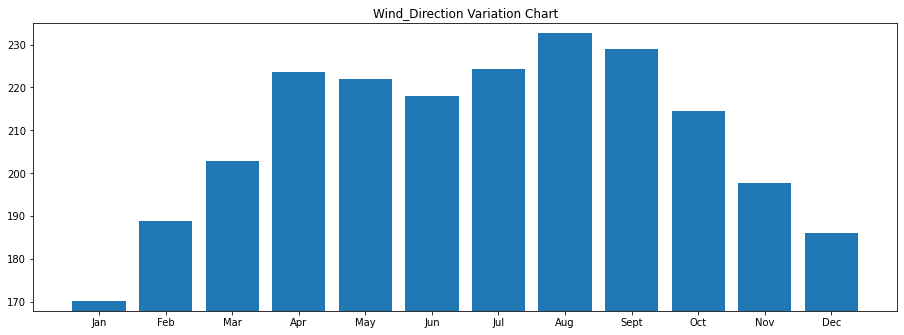

In [12]:
perform_analysis('wind_direction')

### Wind Speed

Mean wind_speed is: 2.796420288279366
Maximum wind_speed is: 3.814722222222222
Minimum wind_speed is: 2.238611111111111


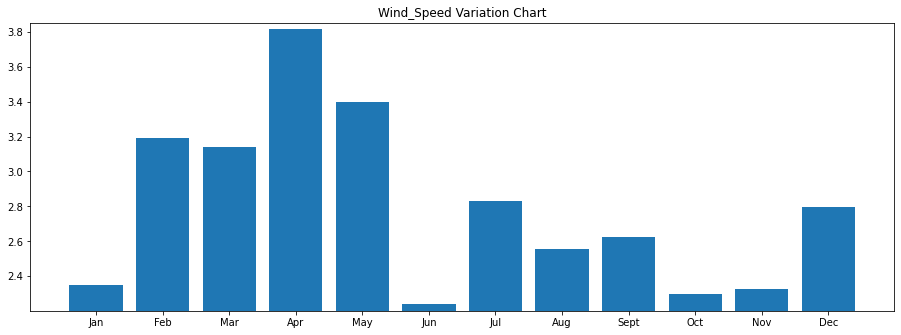

In [13]:
perform_analysis('wind_speed')

## Most experienced weather condition was a clear sky

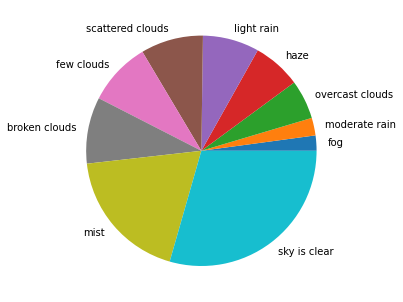

In [14]:
weather_description = city_df.groupby(['weather_description']).size()

weather_dict = {condition:count for condition, count in weather_description.iteritems()}
   

top_weathers = list(sorted(weather_dict.items(), key=lambda item: item[1]))[-10:]

top_weathers = dict(top_weathers)
#print(top_weathers)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(top_weathers.values(), labels=top_weathers.keys())
plt.show()